In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackedn.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
tf.__version__

'2.1.0'

In [5]:
training_set, dataset_info= tfds.load('mnist', split='train', as_supervised=True, with_info=True)

In [6]:
num_classes = dataset_info.features['label'].num_classes
print('There are {:,} classes in our dataset'.format(num_classes))

num_training_examples = dataset_info.splits['train'].num_examples
print('\nThere are {:,} images in the training set'.format(num_training_examples))

There are 10 classes in our dataset

There are 60,000 images in the training set


In [7]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [7]:
for image, label in training_set.take(1):
    print('The images in the training set have: ')
    print('\u2022 dtype: ', image.dtype)
    print('\u2022 shape: ', image.shape)
    print('\nThe labels of the images have: ')
    print('\u2022 dtype: ', label.dtype)

The images in the training set have: 
• dtype:  <dtype: 'uint8'>
• shape:  (28, 28, 1)

The labels of the images have: 
• dtype:  <dtype: 'int64'>


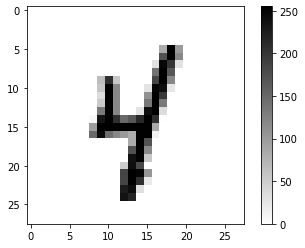

The label of this image is:  4


In [8]:
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()

plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is: ', label)

In [10]:
def normalization(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalization).prefetch(1)

In [11]:
for image_batch, label_batch in training_batches.take(1):
    print('The images in each batch have: ')
    print('\u2022 dtype: ', image_batch.dtype)
    print('\u2022 shape: ', image_batch.shape)

    print('\nThere are a total of {} image labels in this batch: '.format(label_batch.numpy().size))
    print(label_batch.numpy())

The images in each batch have: 
• dtype:  <dtype: 'float32'>
• shape:  (64, 28, 28, 1)

There are a total of 64 image labels in this batch: 
[7 3 6 1 3 4 0 8 8 5 7 0 8 8 4 7 3 1 8 1 9 4 5 3 8 1 7 3 3 8 0 3 3 2 9 1 5
 8 7 3 1 7 3 8 2 3 6 9 9 0 7 7 6 7 8 1 0 8 4 0 8 5 2 9]


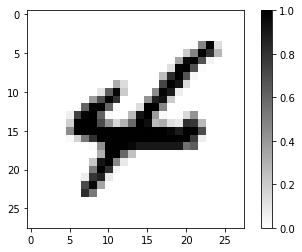

The label of this image is:  4


In [12]:
for image_batch, label_batch in training_batches.take(1):
    images = image_batch.numpy().squeeze()
    labels = label_batch.numpy()

plt.imshow(images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is: ', labels[0])

In [13]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

reshaped_imaged = tf.reshape(images, [images.shape[0], -1])
print('The inputs have shape: ', reshaped_imaged.shape)

w1 = tf.random.normal((784, 256))
b1 = tf.random.normal((1, 256))

w2 = tf.random.normal((256, 10))
b2 = tf.random.normal((1, 10))

h = sigmoid(tf.matmul(reshaped_imaged, w1)+b1)
output = tf.matmul(h, w2) + b2

print('The output has shape: ', output.shape)

The inputs have shape:  (64, 784)
The output has shape:  (64, 10)


In [17]:
print(images.shape[0])

64


In [15]:
def softmax(x):
    return tf.exp(x) / tf.reduce_sum(tf.exp(x), axis=1, keepdims=True)

probabilities = softmax(output)
print('The probabilities have shape: ', probabilities.shape, '\n')

sum_all_prob = tf.reduce_sum(probabilities, axis=1).numpy()
for i, prob_sum in enumerate(sum_all_prob):
    print('Sum of probabilities for Image {}: {:.1f}'.format(i+1, prob_sum))

The probabilities have shape:  (64, 10) 

Sum of probabilities for Image 1: 1.0
Sum of probabilities for Image 2: 1.0
Sum of probabilities for Image 3: 1.0
Sum of probabilities for Image 4: 1.0
Sum of probabilities for Image 5: 1.0
Sum of probabilities for Image 6: 1.0
Sum of probabilities for Image 7: 1.0
Sum of probabilities for Image 8: 1.0
Sum of probabilities for Image 9: 1.0
Sum of probabilities for Image 10: 1.0
Sum of probabilities for Image 11: 1.0
Sum of probabilities for Image 12: 1.0
Sum of probabilities for Image 13: 1.0
Sum of probabilities for Image 14: 1.0
Sum of probabilities for Image 15: 1.0
Sum of probabilities for Image 16: 1.0
Sum of probabilities for Image 17: 1.0
Sum of probabilities for Image 18: 1.0
Sum of probabilities for Image 19: 1.0
Sum of probabilities for Image 20: 1.0
Sum of probabilities for Image 21: 1.0
Sum of probabilities for Image 22: 1.0
Sum of probabilities for Image 23: 1.0
Sum of probabilities for Image 24: 1.0
Sum of probabilities for Image 

In [20]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(256, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
])
print(model.summary)

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f19a0043c50>>


In [22]:
my_model_1 = tf.keras.Sequential([
             tf.keras.layers.Flatten(input_shape=(784)),
             tf.keras.layers.Dense(128, activation='relu'),
             tf.keras.layers.Dense(64, activation='relu'),
             tf.keras.layers.Dense(10, activation='softmax')
])
my_model_1.summary

TypeError: 'int' object is not iterable